## [Accept-Reject Sampling](https://www.youtube.com/watch?v=OXDqjdVVePY)

* Sample from a PDF of a distribution $p(s)$ where $p(s) = \frac{f(s)}{NC}$ and $NC = \int_{-\infty}^{\infty} f(s) ds$ where $f(s)$ is numerator function and $NC$ the (often) intractable normalizing constant
* No need to know the CDF or the full PDF (often numerator known, but not normalizing constant)
* Accept-Reject Sampling
    * Choose another simplier distribution $g(s)$ that is "close" (similar in shape) to $p(s)$ and easy to sample from
    * Scale $g(s)$ by a factor $M$ such that $M*g(s)$ is always above $f(s)$
    * Sample $s \sim g(s)$ and accept $s$ with the prob. of $P(A) = \frac{f(s)}{M*g(s)}$
    * The accepted samples $s$ resembles samples from the $p(s)$

* Why are the accepted samples $s \sim g(s)$ equal to samples from the intractable $p(s)$?
    * Mathematical Proof: $s$ being the sample, $A$ being the event of accepting a sample, $D(x)$ denoting the density function
    
        \begin{align}
            D(s|A) &= \frac{P(A|s)D(s)}{P(A)} &= \frac{\frac{f(s)}{M*g(s)} * g(s)}{P(A)} &= \frac{\frac{f(s)}{M*g(s)} * g(s)}{\int_{-\infty}^{\infty} g(s)*\frac{f(s)}{M*g(s)}}\\
            &= \frac{\frac{f(s)}{M*g(s)} * g(s)}{\frac{1}{M} * \int_{-\infty}^{\infty} f(s) ds} &= \frac{\frac{f(s)}{M*g(s)} * g(s)}{\frac{1}{M} * NC} &= \frac{\frac{f(s)}{M}}{\frac{NC}{M}} \\
            &= \frac{f(s)}{M} * \frac{M}{NC} \\
            &= \frac{f(s)}{NC} 
            &= p(s)\\
        \end{align}

    * Intuitive Explanation: the acceptance probability depends on the ratio $\frac{f(s)}{g(s)}$ which is high when $f(s)$ is high and $g(s)$ is low
        * $f(s)$ is proportional to $p(s)$, so a large $f(s)$ will also result in a high prob. of $p(s)$ => $s$ is very likely in $p(s)$
        * $g(s)$ describes the rarity of a $s$, so if $g(s)$ is very small, it´s a very rare sample with a high prob. of being in $p(s)$  according to our ratio, thus we will accept the sample
        * $M$ is just a normalizing constant, allowing for interpretation as a probability
    
    $\rightarrow$ $\frac{f(s)}{g(s)}$ will be very high for common samples of $p(s)$ but rarily proposed by $g(s)$, vice-versa the ratio will be very low for uncommon samples of $p(s)$ that are commonly proposed by $g(s)$

# Markov Chain Monte Carlo (MCMC) Example

MCMC are a type of sampling technique that allows for sampling implicitly from a target complex distribution (e.g. an intractable posterior distribution). The idea is to make use of first order markov chain (allow for correlation between samples) to approximate the intractable distribution $p_{\theta}(x)$ by sampling multiple iterations until the samples resemble samples from $p_{\theta}(x)$. The first "bad" samples are discarded, this is also called the "burn-in" phase. All samples after the "burn-in" phase are samples from $p_{\theta}(x)$, allowing for sampling without computing $p_{\theta}(x)$.

There are multiple ways of doing MCMC sampling, e.g. Metropolis-Hastings, Gibbs Sampling.

## [Markov Stationary Distribution](https://www.youtube.com/watch?v=4sXiCxZDrTU&list=WL&index=5)

* A stationary distribution is a set of state transition probabilities between all these states, where the probability stays the same over multiple Iterations
    * $\pi = [\pi_1, \pi_2, ..., \pi_n]$ for $n$ different states in the markov chain, where $\pi_n$ describes the transition prob. of the current state to state $n$
    * $\sum_n \pi_n = 1$ (this makes it a distribution) and $P(X_{t+1} = S) = P(X_{t} = S)$ (transition probabilities $S$ stays the same with increasing timestep $t$)
* Computation simplified as finding the left eigenvector of transition Matrix $P$ with eigenvalue 1:
    * $\pi * P = \pi$ with $\pi \in \mathbb{R}^n$ and $P \in \mathbb{R}^{n \times n}$ (dot product of prob. of being in state $n$ in current $t$ with transition prob. of being in state $n$ in $t+1$)
* There is no guarantee that one will arrive at a stationary distribution, if the markov chain runs long enough (convergence not guaranteed)
* There are multiple stationary distributions (not unique!)

## MCMC Sampling Methods
### [Metroplis Hastings](https://www.youtube.com/watch?v=yCv2N7wGDCw&list=WL&index=12)

* Burn-in phase to arrive at samples from $p(x)$
* In contrast to Accept-Reject Sampling, we dont sample from the same distribution $g(x)$ since the in MCMC the samples are correlated (depending) to each other
* So states are depending on the previous sample, we realize this by changing $\theta$ of $g(x)$ depending on the previous sample
    * E.g. for a normal, we set $\mu = x_t$ such that $ g(x_{t+1}|x_t) = \mathcal{N}(x_t,\,\sigma^{2})$ 
    * Metropolis: $g(x)$ is a symmetric distribution
    * Hastings: Generalized case, where $g(x)$ can also by asymmetric
* Process: 
    * 1.) Propose a new sample distribution $g(x_{t+1}|x_t)$ and sample from it
    * 2.) Accept new sample with a certain probability $A(x_t \rightarrow x_{t+1})$ 
    * Where $A(a \rightarrow b) = min(1, r_f r_g)$ with $r_f$ $r_g$ being the ratios from $\frac{A(a \rightarrow b)}{A(b \rightarrow a)} = \frac{f(b)}{f(a)} * \frac{g(a|b)}{g(b|a)} = r_f * r_g$ (detailled balance condition)
    * If $x_{t+1}$ is rejected: $ x_{t+1} = x_t$ (we try again in next step)
* Intuition: If the next state is more probable than your current state, you will 100% go the next state (over iterations this leads to ideally the optimal approximation)



### [Gibbs Sampling](https://www.youtube.com/watch?v=7LB1VHp4tLE)

* Only applicable to multivariante distributions where sampling from the each $n$ of conditional probability distribution $p(x_{n}|x_{n-1},...,x_1)$ is easier than sampling from the joint probability distribution $p(x_{n},x_{n-1},...,x_1)$
* Procedure: Let $X = \{x_1, ..., x_n\}$ denote all random variables 
    * 1) Start with a initial state $s_0 =\{x_1, x_2, ... , x_n\}$ (for n iid. random variables)
    * 2) Sample for all $x_n$ with fixed values for $\{A \ x_n\}$ and repeat for all $n$
    * 3) Over multiple iteration the sample follows the joint probability distribution $p(x_{n},x_{n-1},...,x_1)$
* Drawbacks: we cannot move "across" dimension (that is move multiple steps in more than one dimension), so we can get stuck if the higher densities are only reachable by moving simultaneously in multiple dimensions

## MCMC Experiments

Following Code Example is based on: https://github.com/ritvikmath/YouTubeVideoCode/blob/main/MCMC%20Experiments.ipynb

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [2]:
# function for numerator of target distribution
def f(x):
    if x >= 1:
        return np.exp(-(x-1)/2) + np.exp(-(x-1)**2)
    else:
        return np.exp((x-1)/3) + np.exp((x-1)**3)

# normal PDF
def g(x, mu, sigma):
    return 1/(sigma * np.sqrt(2*np.pi)) * np.exp(-0.5*((x-mu)/sigma)**2)

## Draw Target Distribution

True Expected Value of p(x) = 0.2717289367474419


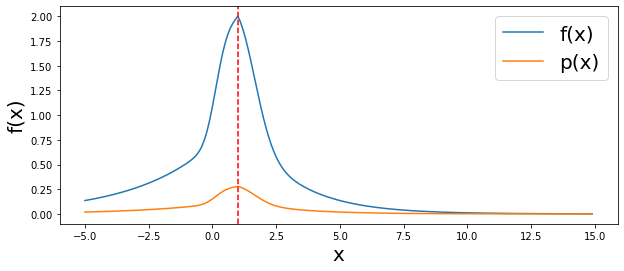

In [3]:
NORM_CONST = 7.16556 #this is usally unknown for us, since it is the hard part to compute in bayesian inference

x_vals = np.arange(-5,15,.1)
f_vals = [f(x) for x in x_vals]
p_vals = [f/NORM_CONST for f in f_vals]

plt.figure(figsize=(10,4))
plt.plot(x_vals, f_vals)
plt.plot(x_vals, p_vals)
plt.legend(['f(x)', 'p(x)'], fontsize=20)
plt.xlabel('x', fontsize=20)
plt.ylabel('f(x)', fontsize=20)
plt.axvline(1, color='r', linestyle='--')

#we want to find the true expected value of p(x) by drawing samples from f(x)
TRUE_EXP = 1.94709 / NORM_CONST
print(f"True Expected Value of p(x) = {TRUE_EXP}")

## 1st Experiment: Accept-Reject with distribution $\mathcal{N}(\mu = 0,\,\sigma^{2} = 3)$

Step 1: Find a good candidate $M * g(x)$ to sample from

Mg(x) needs to be above f(x)


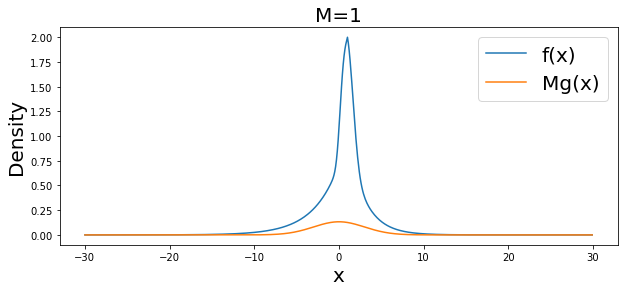

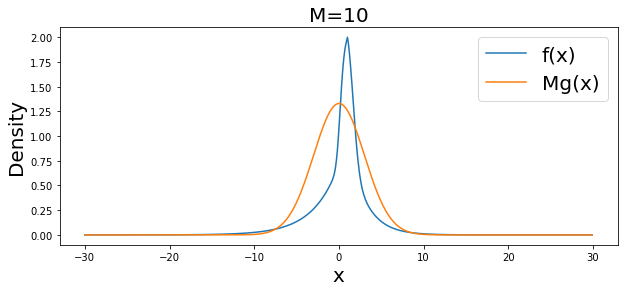

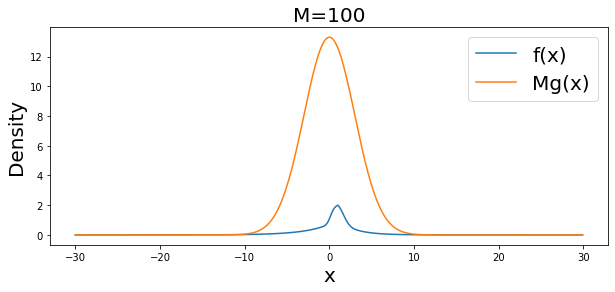

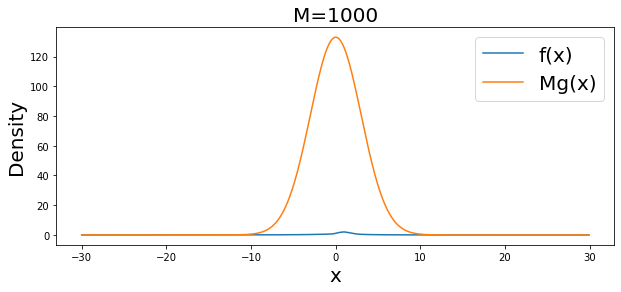

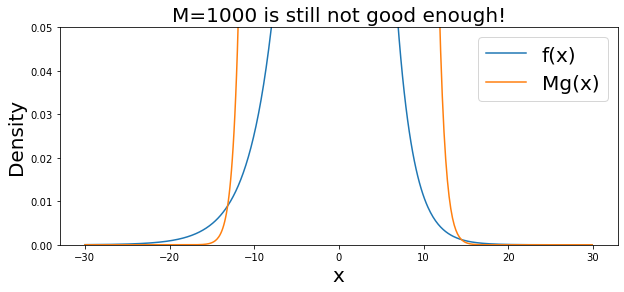

In [4]:
# design g(x) such that scaled by M, is always M * g(x) > f(x)

def compute_and_plot_g(mu, sigma, m):

    x_vals = np.arange(-30,30,.1)
    f_vals = [f(x) for x in x_vals]
    g_vals = g(x_vals, mu, sigma)

    print("Mg(x) needs to be above f(x)")
    for M in m:
        plt.figure(figsize=(10,4))
        plt.plot(x_vals, f_vals)
        plt.plot(x_vals, M*g_vals)
        plt.xlabel('x', fontsize=20)
        plt.ylabel('Density', fontsize=20)
        plt.legend(['f(x)', 'Mg(x)'], fontsize=20)

        
        plt.title("M=%s"%M, fontsize=20)
        plt.show()
        if M == max(m):
            plt.figure(figsize=(10,4))
            plt.plot(x_vals, f_vals)
            plt.plot(x_vals, M*g_vals)
            plt.xlabel('x', fontsize=20)
            plt.ylabel('Density', fontsize=20)
            plt.legend(['f(x)', 'Mg(x)'], fontsize=20)

            plt.title("M=%s is still not good enough!"%M, fontsize=20)

            plt.ylim(0,.05)

compute_and_plot_g(mu=0, sigma=3, m=[1,10,100,1000])

Step 2: Accept-Reject Algorithm (we use $M = 1000$ even though it is not completely above f(x))

In [5]:
def accept_reject_sampling(mu, sigma, M):

    #collect all accepted samples here
    samples = []

    #try this many candidates
    N = 1000000

    for _ in range(N):
        #sample a candidate
        candidate = np.random.normal(mu, sigma)
        
        #calculate probability of accepting this candidate
        prob_accept = f(candidate) / (M*g(candidate, mu, sigma))
        
        #accept with the calculated probability
        if np.random.random() < prob_accept:
            samples.append(candidate)

    print("Num Samples Collected: %s"%len(samples)) # accepted candidates
    print("Efficiency: %s"%round(len(samples) / N, 3)) # efficiency ratio based on iterations

    return samples

samples = accept_reject_sampling(mu=0, sigma=3, M=1000)

Num Samples Collected: 6624
Efficiency: 0.007


Bad efficienty >1 %, due to bad choice of $M$ (not big enough!)
Now plot the accepted samples togehter with $p(x)$ as well as the expected values.

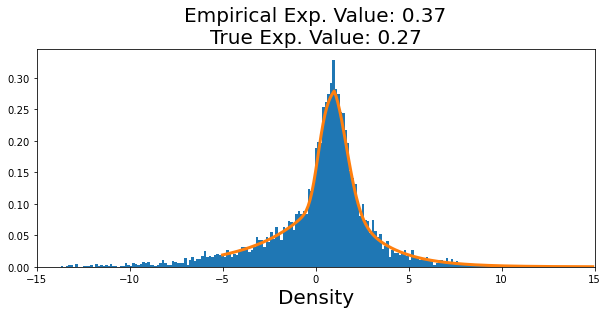

In [6]:
def plot_density(samples):

    plt.figure(figsize=(10,4))
    plt.hist(samples, bins=200, density=True)
    plt.xlabel('x', fontsize=20)
    plt.xlabel('Density', fontsize=20)
    plt.plot(x_vals, [f/NORM_CONST for f in f_vals], linewidth=3)
    plt.xlim(-15,15)

    plt.title('Empirical Exp. Value: %s\nTrue Exp. Value: %s'%(round(np.mean(samples), 2), round(np.mean(TRUE_EXP), 2)), fontsize=20)

plot_density(samples)

Bad choice of distribution $g(x)$, since $f(x)$ was not centered at zero, causing trouble when choosing suitable M.

## 2nd Experiment: Take another candidate distribution $\mathcal{N}(\mu = 1,\,\sigma^{2} = 4)$

Mg(x) needs to be above f(x)


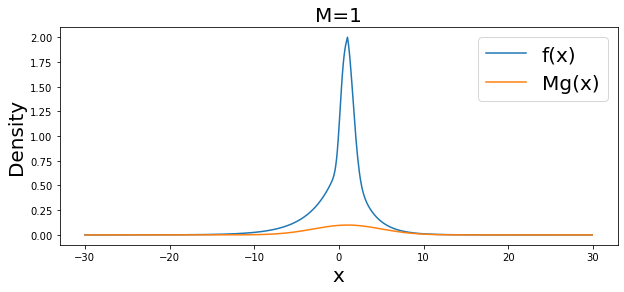

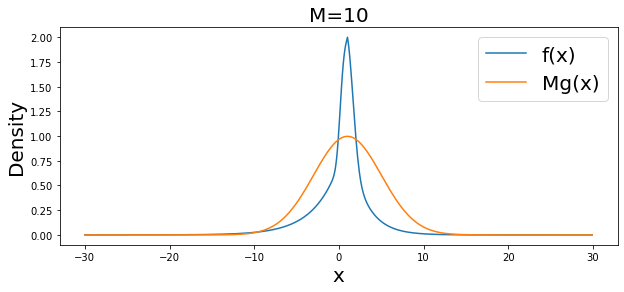

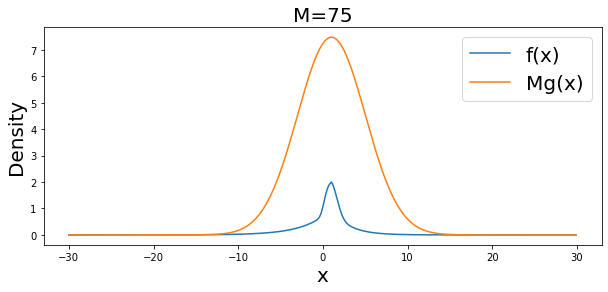

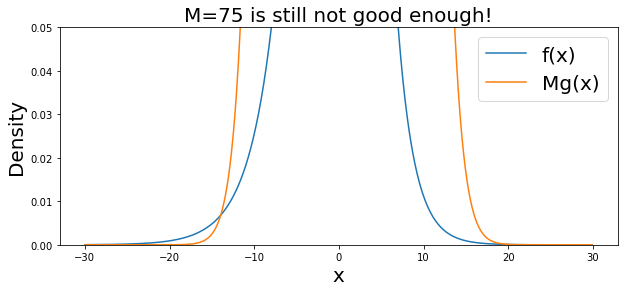

In [7]:
compute_and_plot_g(mu = 1, sigma=4, m=[1,10,75])

We accept M=75, its not perfect, but we achieved better results with a much smaller M!

Num Samples Collected: 90639
Efficiency: 0.091


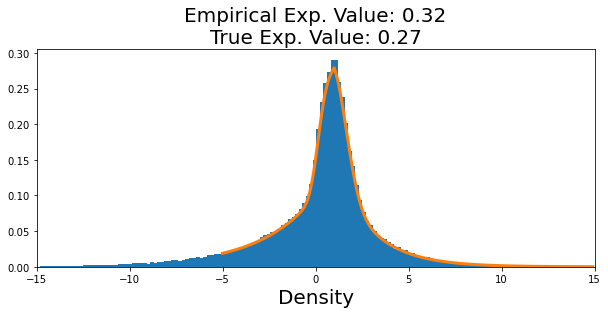

In [8]:
plot_density(accept_reject_sampling(mu=1, sigma=4, M=75))

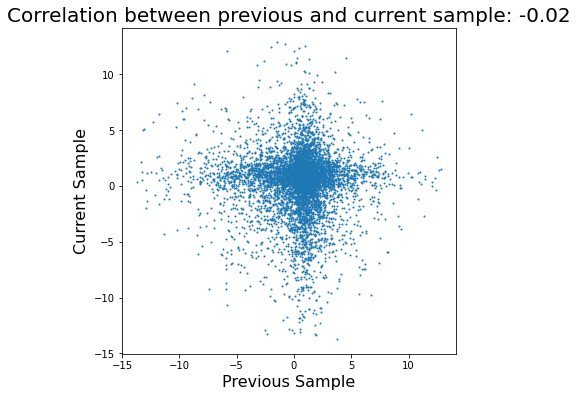

In [9]:
def correlation_diagram(samples):
    plt.figure(figsize=(6,6))
    plt.scatter(samples[:-1], samples[1:], s=1)
    plt.xlabel('Previous Sample', fontsize=16)
    plt.ylabel('Current Sample', fontsize=16)
    corr = round(pearsonr(samples[:-1], samples[1:])[0], 2)
    plt.title('Correlation between previous and current sample: %s'%corr, fontsize=20)

correlation_diagram(samples)

There is no correlation between the samples in Accept-Reject Sampling.

## 3rd Experiment: Metropolis Hastings with $\mathcal{N}(\mu = x_{t-1},\,\sigma^{2} = 3)$

Num Samples Collected: 999000
Efficiency: 0.999
Fraction Acceptances: 0.554859


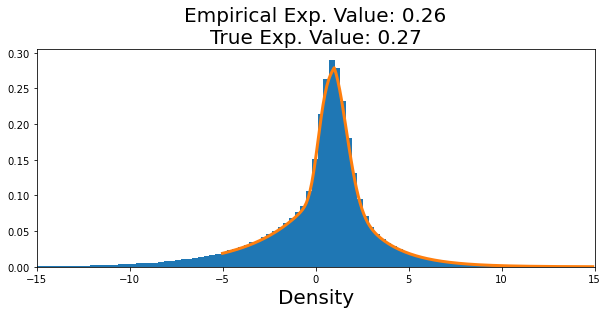

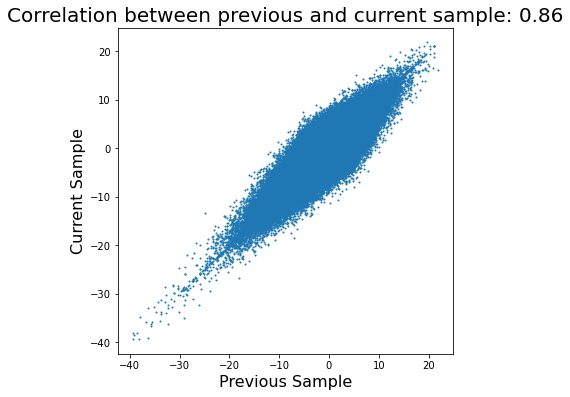

In [12]:
def metropolis_hastings(samples, sigma):
    #arbitraly set x_0 to the second sample from previous experiment
    N = 1000000
    samples = [1]
    num_accept = 0
    for _ in range(N):
        #sample candidate from normal distribution
        candidate = np.random.normal(samples[-1], sigma)
        
        #calculate probability of accepting this candidate
        prob = min(1, f(candidate) / f(samples[-1]))
        
        #accept with the calculated probability
        if np.random.random() < prob:
            samples.append(candidate)
            num_accept += 1
            
        #otherwise report current sample again
        else:
            samples.append(samples[-1])

    #burn-in steps(samples)
    burn_in = 1000
    retained_samples = samples[burn_in+1:]
    print("Num Samples Collected: %s"%len(retained_samples))
    print("Efficiency: %s"%round(len(retained_samples) / N, 3))
    print("Fraction Acceptances: %s"%(num_accept / N))
    return retained_samples


samples = metropolis_hastings(samples, sigma=3)
plot_density(samples)
correlation_diagram(samples)